<a href="https://colab.research.google.com/github/GarimaChopra/Generative_AI/blob/main/nlp_transformers_ch1_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Chapter 1: Getting Started with the Model Architecture of the Transformer**

Below is the basic Python code with only numpy and a softmax function in 10 steps to run the key
aspects of the attention mechanism

**Step 1 : Represent the input**


In [ ]:
import numpy as np
from scipy.special import softmax

In [ ]:
print("Step 1: Input : 3 inputs, d_model=4")
x =np.array([[1.0, 0.0, 1.0, 0.0],   # Input 1
             [0.0, 2.0, 0.0, 2.0],   # Input 2
             [1.0, 1.0, 1.0, 1.0]])  # Input 3

print(x)

Step 1: Input : 3 inputs, d_model=4
[[1. 0. 1. 0.]
 [0. 2. 0. 2.]
 [1. 1. 1. 1.]]


The input of the attention mechanism we are building is scaled down to dmodel = 4 instead of 512. This brings the dimensions of the vector of an input x down to 4 which is easier to visualize.Input x contains 3 inputs with 4 dimensions each instead of 512.

**Step 2: Initializing the weight matrices**

Each Input has 3 weights matrices to train the queries:


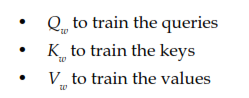

In [ ]:
print("Step 2: weights 3 dimensions x d_model=4")

w_query =np.array([[1, 0, 1],
                   [1, 0, 0],
                   [0, 0, 1],
                   [0, 1, 1]])

w_key =np.array([[0, 0, 1],
                 [1, 1, 0],
                 [0, 1, 0],
                 [1, 1, 0]])

w_value = np.array([[0, 2, 0],
                    [0, 3, 0],
                    [1, 0, 3],
                    [1, 1, 0]])


Step 2: weights 3 dimensions x d_model=4


In [ ]:
print("w_query")
print(w_query)

print("")

print("w_key")
print(w_key)

print("")

print("w_value")
print(w_value)


w_query
[[1 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 1]]

w_key
[[0 0 1]
 [1 1 0]
 [0 1 0]
 [1 1 0]]

w_value
[[0 2 0]
 [0 3 0]
 [1 0 3]
 [1 1 0]]


The three weight matrices are now initialized

**Step 3: Matrix Multiplication to obtain Q,K,V**

In this model, we will assume that there is one w_query, w_key, and w_value weight matrix for all inputs. Other approaches are also possible. Multiplying the input vectors by the w_query followed by two other multiplications

In [ ]:
print("Step 3: Matrix multiplication to obtain Q,K,V")
print("Query: x * w_query")

Q=np.matmul(x,w_query)
print(Q)


Step 3: Matrix multiplication to obtain Q,K,V
Query: x * w_query
[[1. 0. 2.]
 [2. 2. 2.]
 [2. 1. 3.]]


In [ ]:
print("Key: x * w_key")
K=np.matmul(x,w_key)
print(K)

print()

print("Value: x * w_value")
V=np.matmul(x,w_value)
print(V)


Key: x * w_key
[[0. 1. 1.]
 [4. 4. 0.]
 [2. 3. 1.]]

Value: x * w_value
[[1. 2. 3.]
 [2. 8. 0.]
 [2. 6. 3.]]


We have the Q, K, and V values we need to calculate the attention scores.

**Step 4: Scaled attention scores**
The attention head now implements the original Transformer equation:

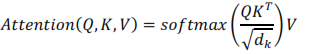

Step 4 focuses on Q and K:


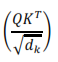

 For this model, we will round:

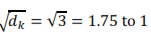

 Plugging the values into the Q and K part of the equation:


In [ ]:
print("Step 4: Scaled Attention Scores")
k_d = 1   #square root of k_d=3 rounded down to 1 for this example
attention_scores = (Q @ K.transpose())/k_d

print(attention_scores)

Step 4: Scaled Attention Scores
[[ 2.  4.  4.]
 [ 4. 16. 12.]
 [ 4. 12. 10.]]


The score for x1 is [2,4,4] across the K vectors across the head as displayed

**Step 5: Scaled softmax attention scores for each vector**

We now apply a softmax function to each intermediate attention score.



In [ ]:
print("Step 5: Scaled softmax attention_scores for each vector")

attention_scores[0]=softmax(attention_scores[0])
attention_scores[1]=softmax(attention_scores[1])
attention_scores[2]=softmax(attention_scores[2])

print(attention_scores[0])
print(attention_scores[1])
print(attention_scores[2])


Step 5: Scaled softmax attention_scores for each vector
[0.06337894 0.46831053 0.46831053]
[6.03366485e-06 9.82007865e-01 1.79861014e-02]
[2.95387223e-04 8.80536902e-01 1.19167711e-01]


Step 5 is complete the softmax of the score of x1 for all the keys is avaiable.

**Step 6: The Final Attention Representation**

We now can finalize the attention equation by plugging V in:

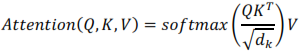

To obtain Attention (Q,K,V) for x1 , we multiply the intermediate attention score by the 3 value vectors one by one to zoom down into the inner workings of the equation



In [ ]:
print("Step 6: attention value obtained by score1/k_d * V")
print(V[0])
print(V[1])
print(V[2])

print("Attention 1")
attention1=attention_scores[0].reshape(-1,1)
attention1=attention_scores[0][0]*V[0]
print(attention1)

print("Attention 2")
attention2=attention_scores[0][1]*V[1]
print(attention2)

print("Attention 3")
attention3=attention_scores[0][2]*V[2]
print(attention3)

Step 6: attention value obtained by score1/k_d * V
[1. 2. 3.]
[2. 8. 0.]
[2. 6. 3.]
Attention 1
[0.06337894 0.12675788 0.19013681]
Attention 2
[0.93662106 3.74648425 0.        ]
Attention 3
[0.93662106 2.80986319 1.40493159]


**Step 7: Summing up the results**

The 3 attention values of input #1 obtained will now be summed to obtain the first line of the output matrix.


In [ ]:
print("Step7: summed the results to create the first line of the output matrix")
attention_input1 = attention1+attention2+attention3

print(attention_input1)


Step7: summed the results to create the first line of the output matrix
[1.93662106 6.68310531 1.59506841]


**Step 8: Step 1 to 7 for all the inputs**

The Transformer can now produce the attention values of input #2 and input #3 using the same method described from Step 1 to Step 7 for one attention head.


In [ ]:
print("Step 8: Step 1 to 7 for inputs 1 to 3")
#We assume we have 3 results with learned weights (they were not trained in this example)
#We assume we are implementing the original Transformer paper. We will have 3 results of 64 dimensions each

attention_head1=np.random.random((3, 64))
print(attention_head1)



Step 8: Step 1 to 7 for inputs 1 to 3
[[0.52115901 0.01656375 0.24793948 0.17660555 0.91473313 0.9443695
  0.37804583 0.88631983 0.0357742  0.6721272  0.18666813 0.86957501
  0.22797953 0.52428554 0.3454355  0.74811115 0.08654997 0.39335152
  0.95432039 0.44328435 0.74662518 0.85764452 0.8546517  0.50023318
  0.51598493 0.32784006 0.16635495 0.50881396 0.46957432 0.83597843
  0.87116208 0.14844952 0.51042436 0.78285764 0.80075332 0.32732785
  0.12511711 0.58113725 0.6041247  0.51001741 0.70148996 0.09834461
  0.42094653 0.8567917  0.47149352 0.65339993 0.35760666 0.69134405
  0.95401765 0.76647956 0.71443492 0.7138796  0.43067987 0.35175014
  0.59054607 0.3204825  0.31050956 0.14223492 0.75147187 0.81897217
  0.81584139 0.08986238 0.08163794 0.11939357]
 [0.10616637 0.7736782  0.4786764  0.32868498 0.14719534 0.16096273
  0.3803775  0.87837483 0.43964002 0.90611908 0.74518166 0.14959342
  0.47261704 0.20458225 0.86528875 0.36135015 0.18187977 0.76377729
  0.79461613 0.91818564 0.765420

The following output displays the simulation of z0, which represents the 3 output vectors of dmodel= 64 dimensions for head 1

**Step 9: The output of the heads of the attention sub-Layer**

We assume that we have trained the 8 heads of the attention sub-layer.

The transformer now has 3 output vectors (of the 3 input vectors that are words or word pieces) of 64 dimensions each

The 8 heads have now produced Z:


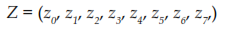


The Transformer will now concatenate the 8 elements of Z for the final output of the multi-head attention sub-layer.

In [ ]:
print("Step 9: We assume we have trained the 8 heads of the attentionsub-layer")
z0h1=np.random.random((3, 64))
z1h2=np.random.random((3, 64))
z2h3=np.random.random((3, 64))
z3h4=np.random.random((3, 64))
z4h5=np.random.random((3, 64))
z5h6=np.random.random((3, 64))
z6h7=np.random.random((3, 64))
z7h8=np.random.random((3, 64))

print("shape of one head",z0h1.shape,"dimension of 8 heads",64*8)


Step 9: We assume we have trained the 8 heads of the attentionsub-layer
shape of one head (3, 64) dimension of 8 heads 512


**Step 10: Concatenation of the output of the heads**

The Transformer concatenates the 8 elements of Z:

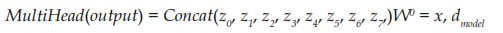

Note that Z is multiplied by W0, which is a weight matrix that is trained as well.

In this model, we will assume W0 is trained and integrated into the concatenation function.

The concatenation produced a standard 512 dimensional output

In [ ]:
print("Step 10: Concantenation of heads 1 to 8 to obtain the original 8x64=512 ouput dimension of the model")
output_attention=np.hstack((z0h1,z1h2,z2h3,z3h4,z4h5,z5h6,z6h7,z7h8))

print(output_attention)



Step 10: Concantenation of heads 1 to 8 to obtain the original 8x64=512 ouput dimension of the model
[[0.2508158  0.39547287 0.5955745  ... 0.76724877 0.86724641 0.99712302]
 [0.9731373  0.83183332 0.50876736 ... 0.13838739 0.74069549 0.99932908]
 [0.67224582 0.55728162 0.26666948 ... 0.75955466 0.37848677 0.93120948]]


In [ ]:
# We first ensure that Hugging Face's transformers are installed:

!pip -qq install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.9 MB/s eta 0:00:00


In [ ]:
# We then import the Hugging Face pipeline, which contains several transformer usages:

from transformers import pipeline



In [ ]:
#  to illustrate the Transformer model of this chapter, we activate the
# translator model and enter a sentence to translate from English to French:

translator = pipeline("translation_en_to_fr")

#One line of code!
print(translator("It is easy to translate languages with transformers", max_length=40))



No model was supplied, defaulted to t5-base and revision 686f1db (https://huggingface.co/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:158: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


[{'translation_text': "Il est facile de traduire des langues à l'aide de transformateurs"}]
